
**Presented By**

Hirbod Gholamniaetakhsami (hirgh815) &
Sachini Niwanthani Bambaranda Bambaranda Gamage (bamba063)

---



# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook.

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters.

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [2]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]])

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]])

<ipython-input-2-01738d8e7eae>:8: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image = misc.ascent()


In [3]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image, gaussFilter, mode='same', boundary='symm')
# mode='same' and boundary='symm' ensure that the output image has the same size as the input image and that the convolution is performed symmetrically at the boundaries.
filterResponseSobelX = signal.convolve2d(image, sobelX, mode='same')
filterResponseSobelY = signal.convolve2d(image, sobelY, mode='same')

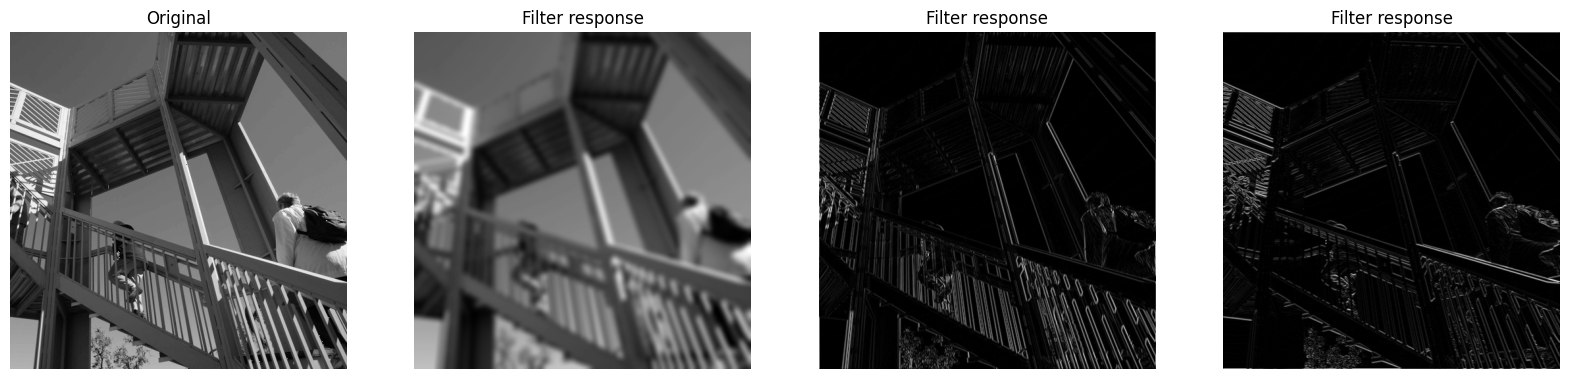

In [4]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?
- **Gaussian filter** This filter remove high frequency noise bluring the image. This gives a smoother version of the original image
- **Sobel X filter** This filter highlihts horizontal edges of the image supressing other features
- **Sobel Y filter** This filter highlihts vertical edges of the image supressing other features


Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?
<br>**Size of the original image is 512x512 pixels. They have only one channel as it's a grayscale image. Color images normally have 3 channels**

Question 3: What is the size of the different filters?
<br>**Gaussian filter size is 15x15 pixels. Sobel X and Sobel Y filter size is 3x3 pixels**

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?
<br>**Filter response(output image) will be the same as input image**

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter?
<br>**filter response will be smaller than the input image.if the filter size is large the response will be small.**

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?
<br>**When you have a CNN with many layers, filter tends to reduce the size of image in each layer resulting loss of information**

In [5]:
# Your code for checking sizes of image and filter responses
org_image = image.shape
gaus_res = filterResponseGauss.shape
sobelx_res = filterResponseSobelX.shape
sobel_yres = filterResponseSobelY.shape

print(f'Original image size - {org_image}')
print(f'Gaussian filter response size - {gaus_res}')
print(f'SobelX filter response size - {sobelx_res}')
print(f'SobelY filter response size - {sobel_yres}')



Original image size - (512, 512)
Gaussian filter response size - (512, 512)
SobelX filter response size - (512, 512)
SobelY filter response size - (512, 512)


##  Part 3: Get a graphics card

Skip this part if you run on a CPU (recommended)

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [1]:
# import os
# import warnings

# # Ignore FutureWarning from numpy
# warnings.simplefilter(action='ignore', category=FutureWarning)

# import keras.backend as K
# import tensorflow as tf

# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";

# # The GPU id to use, usually either "0" or "1";
# os.environ["CUDA_VISIBLE_DEVICES"]="0";

# # Allow growth of GPU memory, otherwise it will always look like all the memory is being used
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ?
<br>**because the input images are color images and have 3 color channels (red, green, and blue)**

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?
<br>**conv2D layer in a neural network learns the filter weights through a training process, where the weights are adjusted to minimize a given loss function. The convolve2d function is used for general-purpose 2D convolution operations. while both scipy.signal.convolve2d and a Conv2D layer perform 2D convolution operations, they are different as the Conv2D layer is a trainable layer that can be used in a neural network.**

Question 9: Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.
<br>**No. GPU is much faster. It can process multiple images at the same time as it is designed to perform parallel computing. With 1000 images GPU will parallelize the computations while 3 images will be processed as a single batch.**

##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [7]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively,
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

170498071/170498071 [==============================] - 13s 0us/step
Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

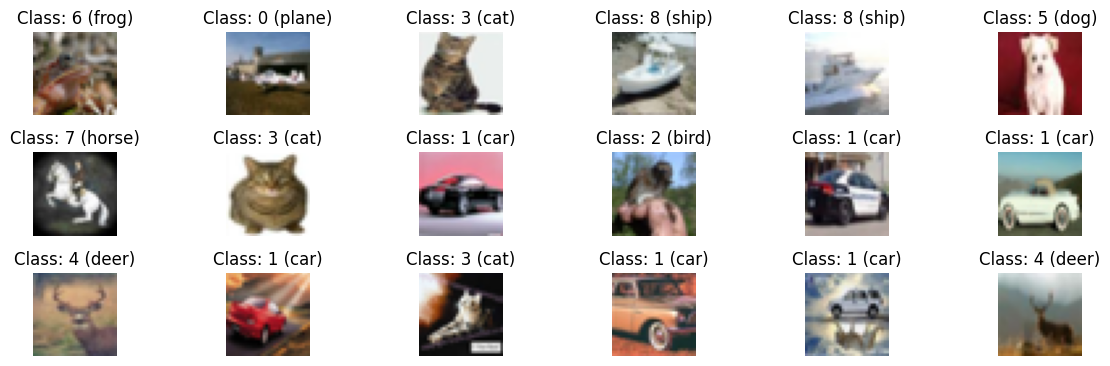

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]

    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [9]:
from sklearn.model_selection import train_test_split

# Your code for splitting the dataset
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, train_size=0.75)

# Print the size of training data, validation data and test data
print(f'Size of training data - {Xtrain.shape}')
print(f'Size of validation data - {Xval.shape}')


Size of training data - (7500, 32, 32, 3)
Size of validation data - (2500, 32, 32, 3)


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [10]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [11]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels
print(f'Training labels size - {Ytrain.shape}')
print(f'Validation labels size - {Yval.shape}')
print(f'Test labels size - {Ytest.shape}')

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain)
Yval = to_categorical(Yval)
Ytest = to_categorical(Ytest)

# Print shapes after converting the labels
print('\nNew shapes after converting')
print(f'Training labels size - {Ytrain.shape}')
print(f'Validation labels size - {Yval.shape}')
print(f'Test labels size - {Ytest.shape}')

Training labels size - (7500, 1)
Validation labels size - (2500, 1)
Test labels size - (2000, 1)

New shapes after converting
Training labels size - (7500, 10)
Validation labels size - (2500, 10)
Test labels size - (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3).

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/) , it relates to how many classes you have.

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [12]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(filters=n_filters, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())


    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
        n_filters *= 2
        model.add(Conv2D(filters=n_filters, kernel_size=(3,3), padding='same', activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(BatchNormalization())

    # Add flatten layer
    model.add(Flatten())

    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(n_nodes, activation='relu'))
        model.add(BatchNormalization())
        if use_dropout:
            model.add(Dropout(0.5))

    # Add final dense layer
    model.add(Dense(10, activation='softmax'))

    # Compile model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [13]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):

    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [14]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model1 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, validation_data=(Xval, Yval))

Epoch 1/20
75/75 [==============================] - 14s 12ms/step - loss: 2.3756 - accuracy: 0.3780 - val_loss: 1.7179 - val_accuracy: 0.3828
Epoch 2/20
75/75 [==============================] - 1s 7ms/step - loss: 1.2770 - accuracy: 0.5561 - val_loss: 1.6503 - val_accuracy: 0.4208
Epoch 3/20
75/75 [==============================] - 1s 8ms/step - loss: 1.0451 - accuracy: 0.6375 - val_loss: 1.5797 - val_accuracy: 0.4236
Epoch 4/20
75/75 [==============================] - 1s 8ms/step - loss: 0.9237 - accuracy: 0.6796 - val_loss: 1.6420 - val_accuracy: 0.4688
Epoch 5/20
75/75 [==============================] - 1s 9ms/step - loss: 0.8298 - accuracy: 0.7100 - val_loss: 1.3788 - val_accuracy: 0.5456
Epoch 6/20
75/75 [==============================] - 1s 7ms/step - loss: 0.7188 - accuracy: 0.7549 - val_loss: 1.4294 - val_accuracy: 0.5452
Epoch 7/20
75/75 [==============================] - 0s 6ms/step - loss: 0.6194 - accuracy: 0.7819 - val_loss: 1.6507 - val_accuracy: 0.5440
Epoch 8/20
75/75 [

In [15]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 4ms/step - loss: 3.3816 - accuracy: 0.5405
Test loss: 3.3816
Test accuracy: 0.5405


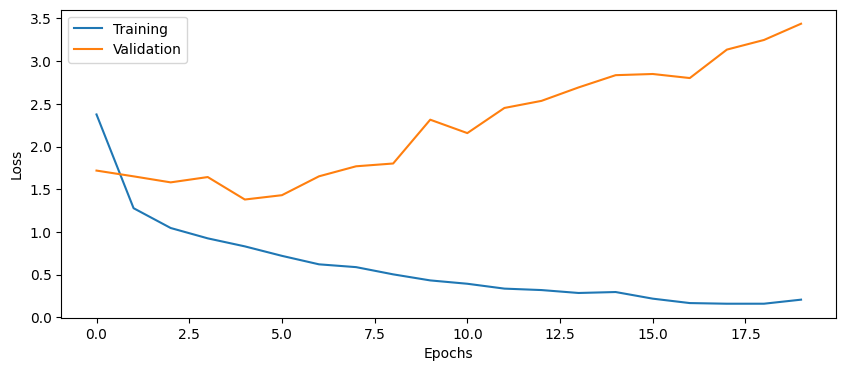

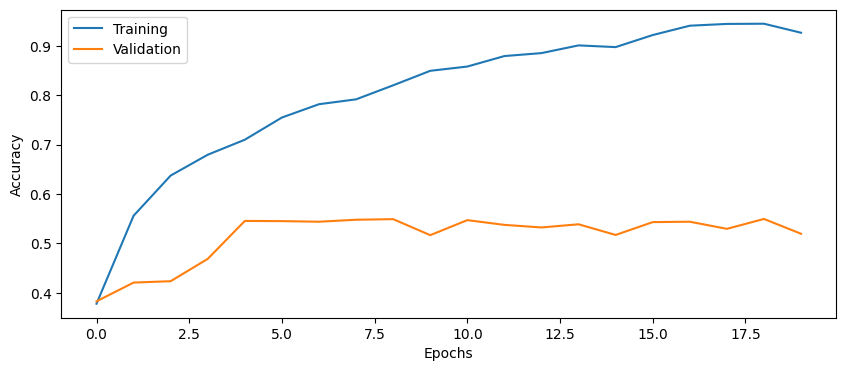

In [16]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ?

Question 10: How big is the difference between training and test accuracy?
<br>**The difference is 0.9917-0.5430=0.4487**

Question 11: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?
<br>**That is because memory requirement for CNN is higher than memory requirement of DNN**
<br>** correct answer: These images have 3072 values per image, while samples in DNN lab had 91 values per sample.**

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [17]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model2 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history2 = model2.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, validation_data=(Xval, Yval))

Epoch 1/20
75/75 [==============================] - 5s 11ms/step - loss: 1.6468 - accuracy: 0.4143 - val_loss: 2.4063 - val_accuracy: 0.2848
Epoch 2/20
75/75 [==============================] - 0s 6ms/step - loss: 1.2648 - accuracy: 0.5457 - val_loss: 2.2930 - val_accuracy: 0.2516
Epoch 3/20
75/75 [==============================] - 1s 7ms/step - loss: 1.0837 - accuracy: 0.6059 - val_loss: 1.9108 - val_accuracy: 0.3596
Epoch 4/20
75/75 [==============================] - 0s 6ms/step - loss: 0.9011 - accuracy: 0.6788 - val_loss: 1.5667 - val_accuracy: 0.4872
Epoch 5/20
75/75 [==============================] - 0s 6ms/step - loss: 0.7317 - accuracy: 0.7405 - val_loss: 1.5135 - val_accuracy: 0.5240
Epoch 6/20
75/75 [==============================] - 0s 6ms/step - loss: 0.6071 - accuracy: 0.7845 - val_loss: 1.6945 - val_accuracy: 0.5316
Epoch 7/20
75/75 [==============================] - 0s 6ms/step - loss: 0.4514 - accuracy: 0.8405 - val_loss: 1.8036 - val_accuracy: 0.5440
Epoch 8/20
75/75 [=

In [18]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 3ms/step - loss: 3.6082 - accuracy: 0.5345
Test loss: 3.6082
Test accuracy: 0.5345


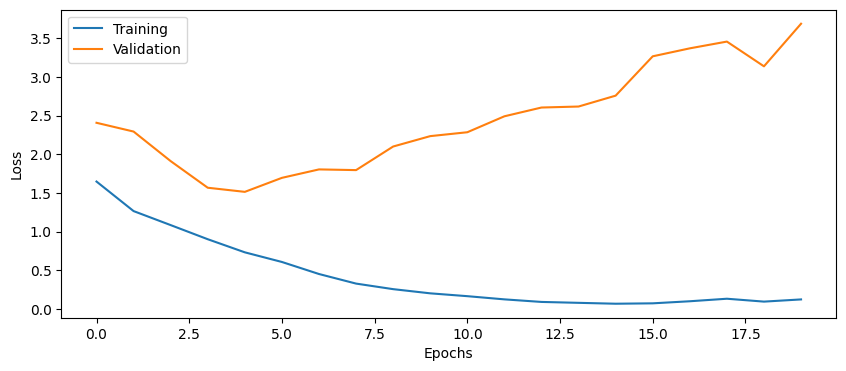

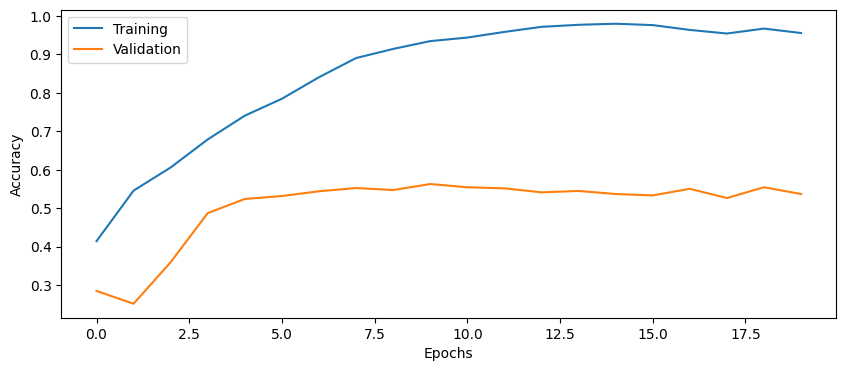

In [19]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [20]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model3 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history3 = model3.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, validation_data=(Xval, Yval))

Epoch 1/20
75/75 [==============================] - 6s 15ms/step - loss: 1.7479 - accuracy: 0.3619 - val_loss: 1.6995 - val_accuracy: 0.3688
Epoch 2/20
75/75 [==============================] - 1s 10ms/step - loss: 1.3644 - accuracy: 0.5029 - val_loss: 1.6714 - val_accuracy: 0.4016
Epoch 3/20
75/75 [==============================] - 1s 9ms/step - loss: 1.1660 - accuracy: 0.5744 - val_loss: 1.4414 - val_accuracy: 0.5012
Epoch 4/20
75/75 [==============================] - 1s 8ms/step - loss: 0.9936 - accuracy: 0.6457 - val_loss: 1.2619 - val_accuracy: 0.5736
Epoch 5/20
75/75 [==============================] - 1s 9ms/step - loss: 0.8345 - accuracy: 0.7023 - val_loss: 1.3895 - val_accuracy: 0.5492
Epoch 6/20
75/75 [==============================] - 1s 9ms/step - loss: 0.6804 - accuracy: 0.7560 - val_loss: 1.8864 - val_accuracy: 0.4928
Epoch 7/20
75/75 [==============================] - 1s 10ms/step - loss: 0.5528 - accuracy: 0.8067 - val_loss: 1.9849 - val_accuracy: 0.5124
Epoch 8/20
75/75 

In [21]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 7ms/step - loss: 2.6236 - accuracy: 0.5665
Test loss: 2.6236
Test accuracy: 0.5665


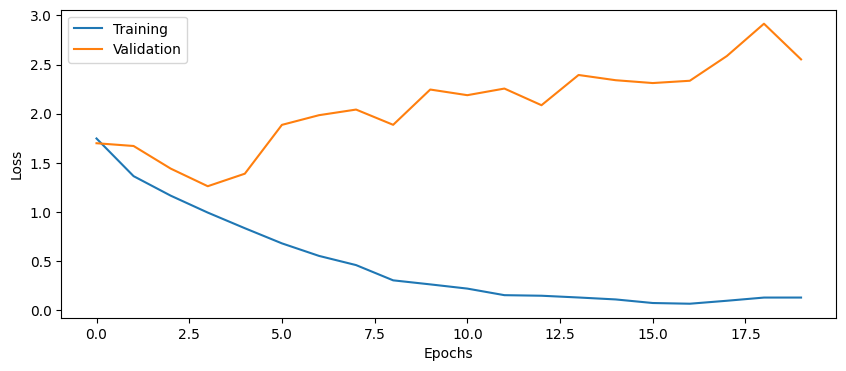

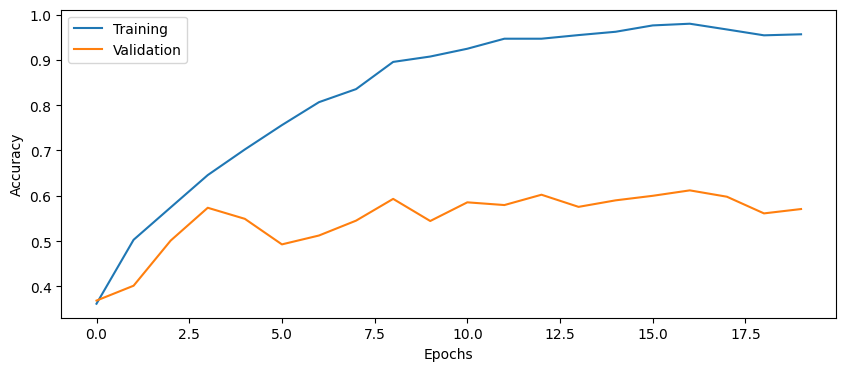

In [22]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 12: How many trainable parameters does your network have? Which part of the network contains most of the parameters?
<br>**124,180**

Question 13: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output?
<br>**Input is a 4D tensor(2*2) with shape (batch_size, height, width, channels). Output is also a 4D tensor with shape (batch_size, height, width, filters).**

Question 14: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/
<br>**Depending on the data_format argument the ordering can be different, but the batch size is always the first dimension.**

Question 15: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?
<br>**128**

Question 16: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?
<br>**This is because of parameter sharing.**
<br>** correct answer: Conv2D learns one filter per input channel and almost performs a 3D convolution, it does not learn the same 2D filter for all channels**

Question 17: How does MaxPooling help in reducing the number of parameters to train?
<br>**MaxPooling reduces the size of the input, which reduces the number of parameters in the next layer.**

In [23]:
# Print network architecture

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 16, 16, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                      

##  Part 14: Dropout regularization

Add dropout regularization between each intermediate dense layer, dropout probability 50%.

Question 18: How much did the test accuracy improve with dropout, compared to without dropout?
<br>**The test accuracy improved from 0.5860 to 0.6015**

Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?
<br>**L1 regularization and L2 regularization can be applied.**
<br>**To add L2 regularization we can use kernel_regularizer in the convolutional layer created by conv2D**

## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [24]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model4 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=True, learning_rate=0.01)

# Train the model  using training data and validation data
history4 = model4.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, validation_data=(Xval, Yval))

Epoch 1/20
75/75 [==============================] - 5s 13ms/step - loss: 1.9312 - accuracy: 0.3192 - val_loss: 2.0912 - val_accuracy: 0.2844
Epoch 2/20
75/75 [==============================] - 1s 9ms/step - loss: 1.5257 - accuracy: 0.4341 - val_loss: 2.0279 - val_accuracy: 0.2920
Epoch 3/20
75/75 [==============================] - 1s 9ms/step - loss: 1.3841 - accuracy: 0.4959 - val_loss: 1.5142 - val_accuracy: 0.4612
Epoch 4/20
75/75 [==============================] - 1s 9ms/step - loss: 1.2448 - accuracy: 0.5447 - val_loss: 1.3344 - val_accuracy: 0.5296
Epoch 5/20
75/75 [==============================] - 1s 8ms/step - loss: 1.1617 - accuracy: 0.5829 - val_loss: 1.2075 - val_accuracy: 0.5772
Epoch 6/20
75/75 [==============================] - 1s 8ms/step - loss: 1.0208 - accuracy: 0.6361 - val_loss: 1.2944 - val_accuracy: 0.5740
Epoch 7/20
75/75 [==============================] - 1s 8ms/step - loss: 0.9166 - accuracy: 0.6721 - val_loss: 1.3187 - val_accuracy: 0.5636
Epoch 8/20
75/75 [=

In [25]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 3ms/step - loss: 2.1328 - accuracy: 0.6035
Test loss: 2.1328
Test accuracy: 0.6035


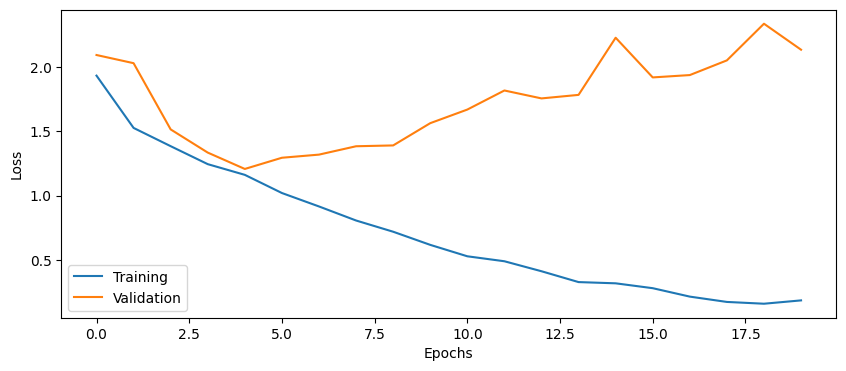

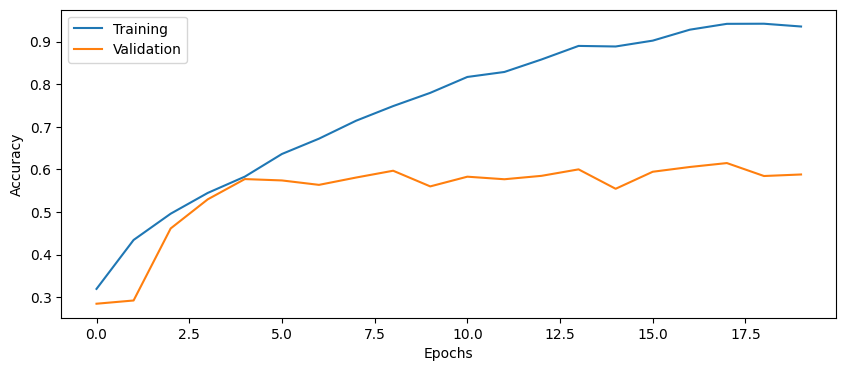

In [26]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 20: How high test accuracy can you obtain? What is your best configuration?
<br>**The highest test accuracy we could obtain was 0.6115. Our best configuration was 5 convolutional layers, 1 intermediate dense layer (50 nodes), dropout=False, and number of filters=64.**

## Your best config

In [27]:
# Setup some training parameters
batch_size = 300
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model5 = build_CNN(input_shape, n_conv_layers=5, n_filters=64, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history5 = model5.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, validation_data=(Xval, Yval))

Epoch 1/20
25/25 [==============================] - 10s 80ms/step - loss: 2.0702 - accuracy: 0.2596 - val_loss: 26.9517 - val_accuracy: 0.2052
Epoch 2/20
25/25 [==============================] - 1s 46ms/step - loss: 1.6882 - accuracy: 0.3665 - val_loss: 3.3960 - val_accuracy: 0.2804
Epoch 3/20
25/25 [==============================] - 1s 47ms/step - loss: 1.5235 - accuracy: 0.4292 - val_loss: 6.0865 - val_accuracy: 0.1404
Epoch 4/20
25/25 [==============================] - 1s 48ms/step - loss: 1.4028 - accuracy: 0.4776 - val_loss: 3.5593 - val_accuracy: 0.1640
Epoch 5/20
25/25 [==============================] - 1s 48ms/step - loss: 1.2732 - accuracy: 0.5269 - val_loss: 2.4185 - val_accuracy: 0.2664
Epoch 6/20
25/25 [==============================] - 1s 48ms/step - loss: 1.1532 - accuracy: 0.5760 - val_loss: 2.6051 - val_accuracy: 0.2764
Epoch 7/20
25/25 [==============================] - 1s 48ms/step - loss: 1.0318 - accuracy: 0.6255 - val_loss: 2.1414 - val_accuracy: 0.3320
Epoch 8/20


In [28]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 8ms/step - loss: 2.0497 - accuracy: 0.6185
Test loss: 2.0497
Test accuracy: 0.6185


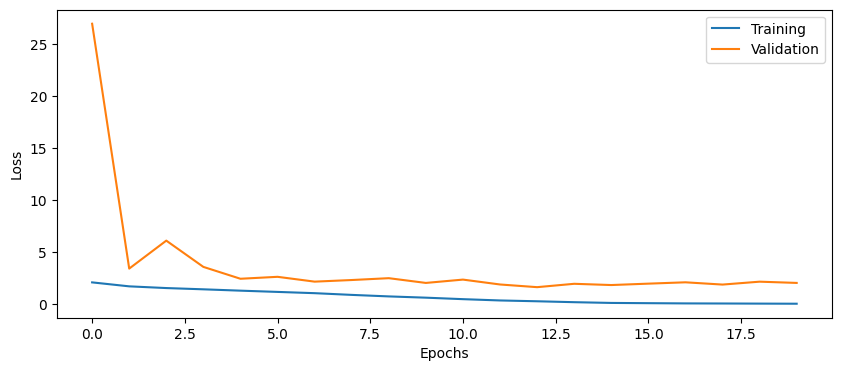

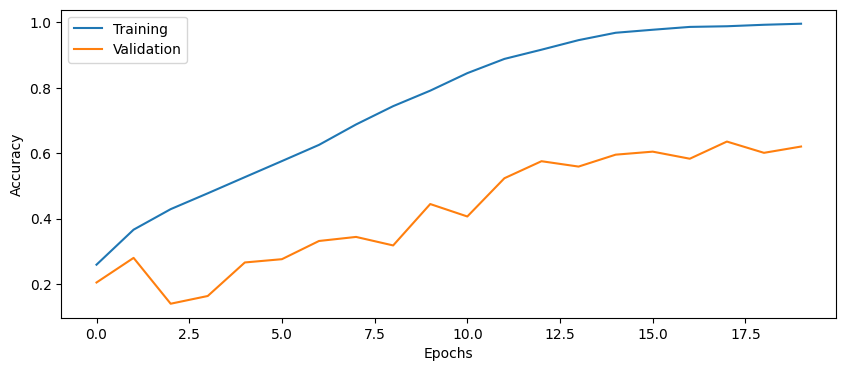

In [29]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 21: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.
<br>**The test accuracy for rotated test images is 0.2260, which is far lower than the test accuracy for test images without rotation (0.6115). This is because the CNN is not trained on rotated images, so it does not know how to classify them.**

In [30]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))

    return images_rot

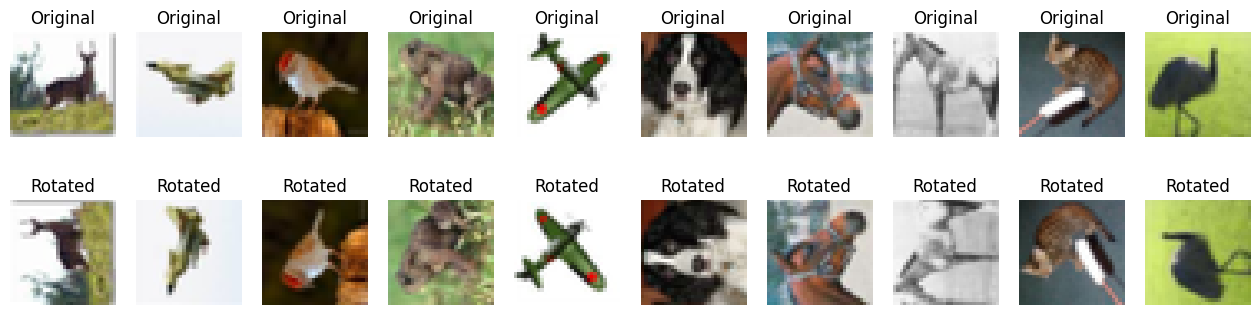

In [31]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)

    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [32]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 5ms/step - loss: 6.3907 - accuracy: 0.1975
Test loss: 6.3907
Test accuracy: 0.1975


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , the .flow(x,y) functionality

Make sure to use different subsets for training and validation when you setup the flows, otherwise you will validate on the same data...

In [33]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [34]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)


# Setup a flow for training data, assume that we can fit all images into CPU memory
train_generator = datagen.flow(
    Xtrain, Ytrain,
    batch_size=32,
    subset='training'
)

# Setup a flow for validation data, assume that we can fit all images into CPU memory
val_generator = datagen.flow(
    Xtrain, Ytrain,
    batch_size=32,
    subset='validation'
)

## Part 18: What about big data?

Question 22: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?
<br>**If we cannot fit all training images in CPU memory, we would have to use the .flow_from_directory() function instead of the .flow() function. The disadvantage of this is that we would have to store the images in a directory, which would take much more time than just loading them into memory.**

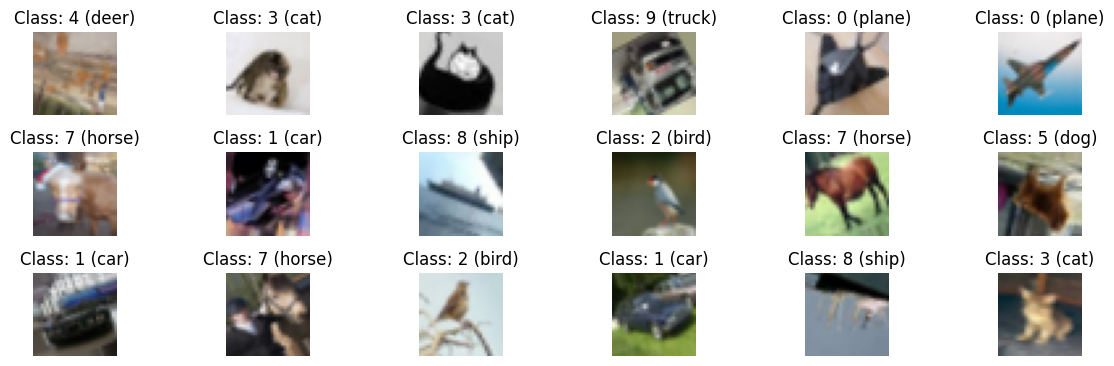

In [35]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]

    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size

This is required since with a generator, the fit function will not know how many examples your original dataset has.

Question 23: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. We are here talking about the number of training epochs required to reach a certain accuracy, and not the training time in seconds. What parameter is necessary to change to perform more training?

<br>**The training accuracy is increasing slower with augmentation than without. This is because we are training on more images, and therefore the model is able to learn more. The parameter that is necessary to change to perform more training is the number of epochs.**

Question 24: What other types of image augmentation can be applied, compared to what we use here?
<br>**Other types of image augmentation that can be applied are: zooming, shearing, shifting, brightness changes, and adding other types of noises**

In [36]:
# Setup some training parameters
batch_size = 100
epochs = 200
input_shape = Xtrain.shape[1:]

# Build model (your best config)
model6 = build_CNN(input_shape, n_conv_layers=5, n_filters=64, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)

validation_split=0.2

# Train the model using on the fly augmentation
history6 = model6.fit(train_generator, batch_size=batch_size, epochs=epochs, validation_data=val_generator, validation_split=validation_split, verbose=1)


Epoch 1/200
250/250 [==============================] - 13s 28ms/step - loss: 1.9662 - accuracy: 0.2735 - val_loss: 1.9843 - val_accuracy: 0.2840
Epoch 2/200
250/250 [==============================] - 8s 32ms/step - loss: 1.7446 - accuracy: 0.3545 - val_loss: 1.7260 - val_accuracy: 0.3840
Epoch 3/200
250/250 [==============================] - 6s 26ms/step - loss: 1.6206 - accuracy: 0.4009 - val_loss: 1.7541 - val_accuracy: 0.3960
Epoch 4/200
250/250 [==============================] - 8s 30ms/step - loss: 1.5320 - accuracy: 0.4425 - val_loss: 1.6617 - val_accuracy: 0.4305
Epoch 5/200
250/250 [==============================] - 8s 33ms/step - loss: 1.4552 - accuracy: 0.4629 - val_loss: 1.3950 - val_accuracy: 0.5060
Epoch 6/200
250/250 [==============================] - 6s 26ms/step - loss: 1.3887 - accuracy: 0.4969 - val_loss: 1.4071 - val_accuracy: 0.4990
Epoch 7/200
250/250 [==============================] - 8s 32ms/step - loss: 1.3256 - accuracy: 0.5246 - val_loss: 1.3617 - val_accuracy

In [37]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 2.0024
Test accuracy: 0.6975
Test loss: 5.1765
Test accuracy: 0.3180


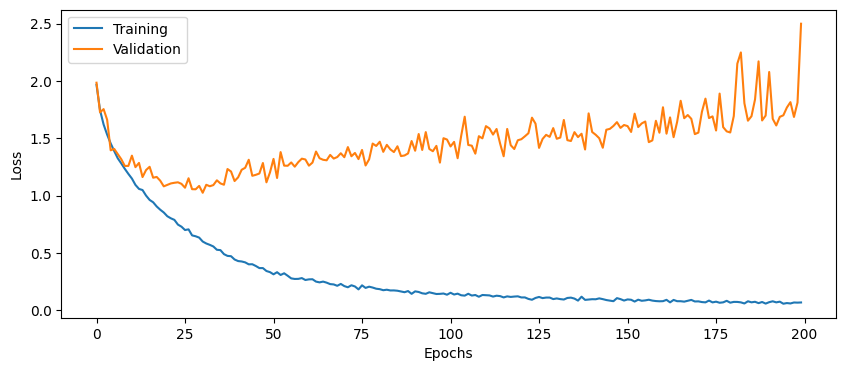

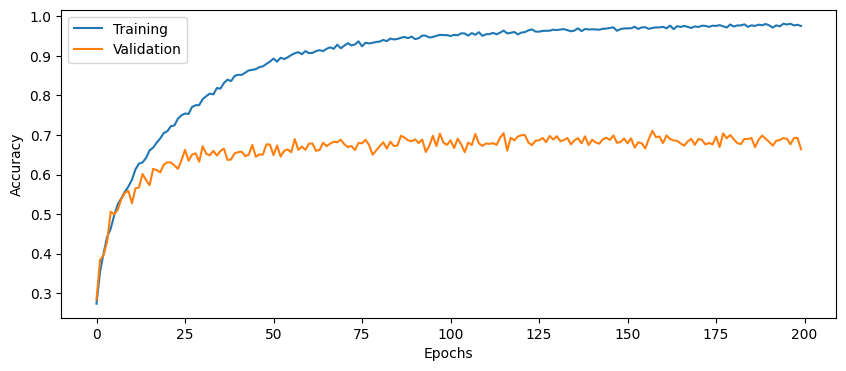

In [38]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [39]:
# Find misclassified images
y_pred=model6.predict(Xtest)
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

63/63 [==============================] - 0s 3ms/step


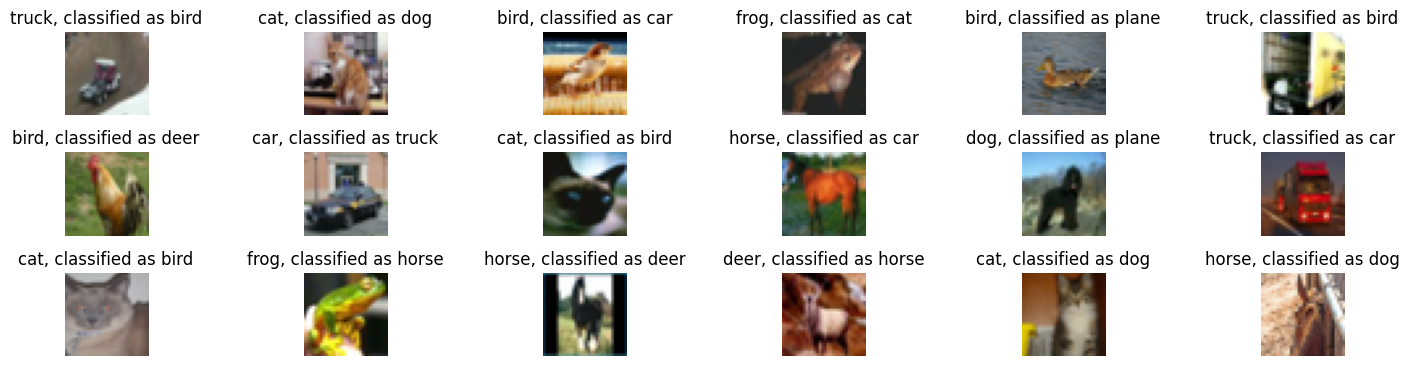

In [40]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]

    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 25: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?
<br>**No, it cannot be applied to images of another size. This is because the CNN has been trained on 32x32 images, and therefore it expects the input to be of that size.**

Question 26: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?
<br>**Yes, it is possible to design a CNN that can be trained on images of one size, and then applied to an image of any size. This can be done by using a global average pooling layer(a pooling operation designed to replace fully connected layers in classical CNNs) instead of a fully connected layer. This will make the model independent of the input size.**

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 27: How many convolutional layers does ResNet50 have?
<br>**50 convolutional layers**

Question 28: How many trainable parameters does the ResNet50 network have?
<br>**approximately 23.5 million trainable parameters**

Question 29: What is the size of the images that ResNet50 expects as input?
<br>**input images of size 224x224 pixels**

Question 30: Using the answer to question 28, explain why the second derivative is seldom used when training deep networks.
<br>**computing the second-order derivative of the loss function with respect to all 23.5 million parameters in a deep network is computationally expensive. nevertheless it requires more memory.**

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function

Useful functions

`image.load_img` in tensorflow.keras.preprocessing

`image.img_to_array` in tensorflow.keras.preprocessing

`ResNet50` in tensorflow.keras.applications.resnet50

`preprocess_input` in tensorflow.keras.applications.resnet50

`decode_predictions` in tensorflow.keras.applications.resnet50

`expand_dims` in numpy


In [43]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice.
# The preprocessing should transform the image to a size that is expected by the CNN.
import tensorflow.keras.preprocessing.image as image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from numpy import expand_dims


# define the code above as a function
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = expand_dims(img, axis=0)
    img = preprocess_input(img)
    model = ResNet50()
    yhat = model.predict(img)
    label = decode_predictions(yhat)
    label = label[0][0]
    print('%s (%.2f%%)' % (label[1], label[2]*100))

predict_image("/data_DL_tasks/1.jpg")
predict_image("/data_DL_tasks/2.jpg")
predict_image("/data_DL_tasks/3.jpg")
predict_image("/data_DL_tasks/4.jpg")
predict_image("/data_DL_tasks/5.jpg")



1/1 [==============================] - 1s 1s/step
birdhouse (93.06%)
1/1 [==============================] - 1s 867ms/step
barn (34.20%)
1/1 [==============================] - 1s 914ms/step
borzoi (83.32%)
1/1 [==============================] - 1s 835ms/step
goose (64.14%)
1/1 [==============================] - 1s 854ms/step
hand_blower (23.56%)


<ipython-input-42-dfb445cefa38>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


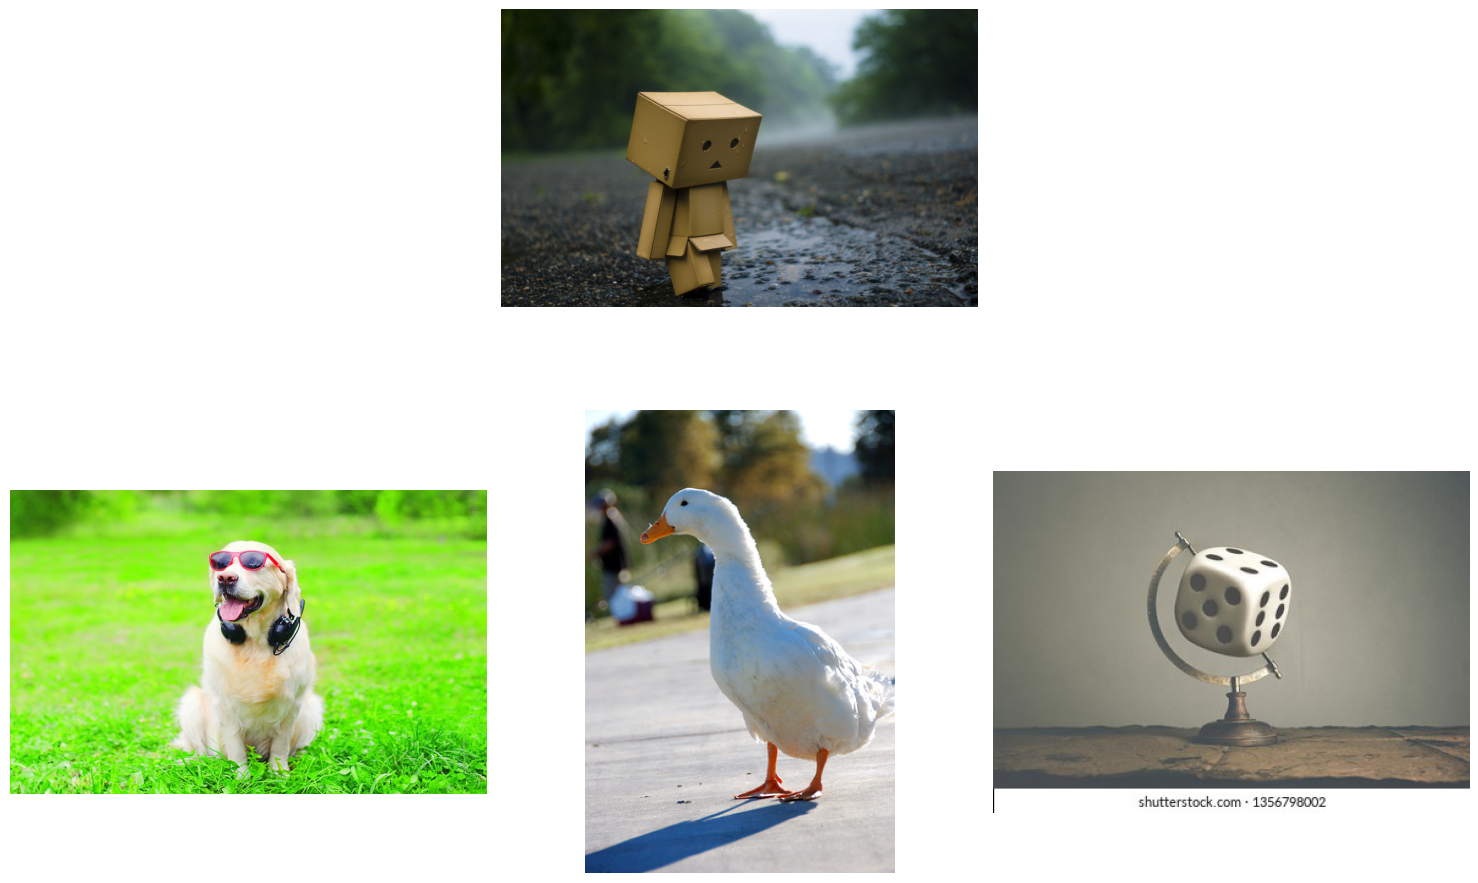

In [42]:
# display the images in a 2x3 grid
plt.figure(figsize=(15,10))
for i in range(1,6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(plt.imread('/data_DL_tasks/{}.jpg'.format(i)))
    plt.axis('off')
